In [1]:
import pandas as pd
df=pd.read_csv('C:/Users/Ritwiz/OneDrive/Desktop/iris.csv')
df.drop('species', axis=1, inplace = True)
df.drop('petal_width', axis=1, inplace = True)
df.head()

,sepal_length,sepal_width,petal_length
0,5.1,3.5,1.4
1,4.9,3.0,1.4
2,4.7,3.2,1.3
3,4.6,3.1,1.5
4,5.0,3.6,1.4


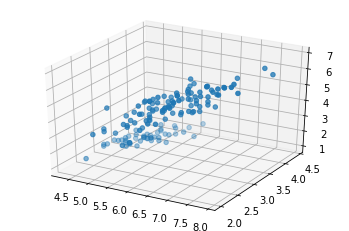

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
new_array=df.values[:,0:3]
ax.scatter(new_array[:,0],new_array[:,1],new_array[:,2])

In [3]:
# WE SET 3 AS THE NUMBER OF CLUSTERS
# K=3
# LET "c" BE A LIST OF THE 3 MEANS

In [4]:
import numpy as np
from scipy.spatial import distance
#====================
#INITIAL MEANS
#===================
c=[]

# ------------------------
# RANDOMLY SELECT 1ST MEAN
# ------------------------
rows = new_array.shape[0]
temp = np.random.randint(1,rows+1) # random integer from uniform dist, range [0,rows+1)
c.append(new_array[temp]) # SET 1ST CENTRE RANDOMLY FROM DATASET

    
# --------------------------------------------
# ROULETTE WHEEL BASED SELECTION OF "2ND" MEAN
# --------------------------------------------

# compute distance squared from 1st centre
D2=[]
for i in range(rows):
    d=distance.euclidean(c[0],new_array[i])
    D2.append(d*d)

# compute cumulative distnace squared in cumul
cumul=[]
sum_val=0
for i in range(len(D2)):
    sum_val=sum_val+D2[i]
    cumul.append(sum_val)
    
# probabilities
for i in range(len(cumul)):
    cumul[i]=cumul[i]/sum_val
    
p = np.random.uniform(0,1)
for i in range(len(cumul)):
    if cumul[i] >= p:
        index=i
        break
        
c.append(new_array[index]) # SET 2ND MEAN

# --------------------------------------------
# ROULETTE WHEEL BASED SELECTION OF "3RD" MEAN
# --------------------------------------------

# compute shortest distance squared (from both centres)
D2=[]
for i in range(rows):
    d1=distance.euclidean(c[0],new_array[i])
    d2=distance.euclidean(c[1],new_array[i])
    if d1*d1 >= d2*d2:
        D2.append(d2*d2)
    if d2*d2 > d1*d1:
        D2.append(d1*d1)
        
# compute cumulative distnace squared in cumul
cumul=[]
sum_val=0
for i in range(len(D2)):
    sum_val=sum_val+D2[i]
    cumul.append(sum_val)
    
# probabilities
for i in range(len(cumul)):
    cumul[i]=cumul[i]/sum_val
    
p = np.random.uniform(0,1)
for i in range(len(cumul)):
    if cumul[i] >= p:
        index=i
        break
        
c.append(new_array[index]) # SET 3RD MEAN

In [5]:
# WE NOW HAVE 3 MEANS SELECTED VIA CAREFUL SEEDING
#c=[l.tolist() for l in c]
c=np.asarray(c)
c

array([[6.7, 3. , 5. ],
       [5.8, 2.6, 4. ],
       [5.2, 3.4, 1.4]])

In [6]:
# NOW PROCEEDING WITH NORMAL K-MEANS
# WITH THESE 3 MEANS AS THE INITIAL CENTRES
from copy import deepcopy

c_old=[[0,0,0],[0,0,0],[0,0,0]] # To store the value of centroids when it updates
c_old=np.asarray(c_old)

clusters = np.zeros(rows) # Cluster Lables(0, 1, 2)

error=np.linalg.norm(c-c_old,axis=1) # Error variable for euclidean distance between new centroids and old centroids

# Loop will run till the error becomes zero
while (error != 0).all():
    # Assigning each value to its closest cluster
    for i in range(rows):
        distances = np.linalg.norm(new_array[i]-c,axis=1) #computes dist of an object with each cluster centre
        cluster = np.argmin(distances) #returns the index containing the min dist in "distances"
        clusters[i] = cluster #assigns cluster label
    # Storing the old centroid values
    c_old = deepcopy(c)
    # Finding the new centroids by taking the average value
    for i in range(3): #range(3) since there are 3 clusters
        points = [new_array[j] for j in range(rows) if clusters[j] == i]
        c[i] = np.mean(points, axis=0)
    error = np.linalg.norm(c-c_old, axis=1)


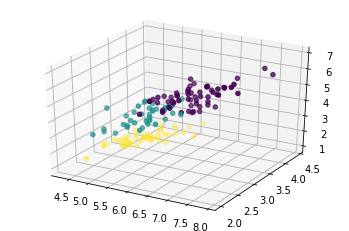

In [7]:
fig1 = plt.figure()
ax1 = fig1.add_subplot(111, projection='3d')

ax1.scatter(new_array[:,0],new_array[:,1],new_array[:,2], c=clusters.astype(np.float))

In [8]:
# to see how np.linalg.norm(a-b,axis=1) and np.argmin(a) work
oo=np.asarray([1,2,3])
uu=np.asarray([[4,5,6],[1,2,3],[7,8,9]])
vv=np.linalg.norm(oo-uu,axis=1)
ww=np.argmin(vv)

In [9]:
'''
# NOW PROCEEDING WITH NORMAL K-MEANS
# WITH THESE 3 MEANS AS THE INITIAL CENTRES
c_old=[[0,0,0],[0,0,0],[0,0,0]]
error=True # boolean variable
for p in range(len(c)):
    for q in range(len(c[p])):
        if c[p][q]!=c_old[p][q]:
            error=False
            
while error == False:
    dist=[]
    labels=[]
    temp1=[0,0,0]
    temp2=[0,0,0]
    temp3=[0,0,0]
    count1=0
    count2=0
    count3=0
    for i in range(rows):
        dd1=distance.euclidean(c[0],new_array[i])
        dd2=distance.euclidean(c[1],new_array[i])
        dd3=distance.euclidean(c[2],new_array[i])
        if dd1<dd2 and dd1<dd3:
            labels.append(1)
        if dd2<dd1 and dd2<dd3:
            labels.append(2)
        if dd3<dd1 and dd3<dd2:
            labels.append(3)
    c_old=c
    for j in range(rows):
        if labels[j]==1:
            count1=count1+1
            temp1=temp1+new_array[i]
        if labels[j]==2:
            count2=count2+1
            temp2=temp2+new_array[i]
        if labels[j]==3:
            count3=count3+1
            temp3=temp3+new_array[i]
    for i in range(len(temp1)):
        temp1[i]=temp1[i]/count1
        temp2[i]=temp2[i]/count2
        temp3[i]=temp3[i]/count3
    c=[]
    c.append(temp1)
    c.append(temp2)
    c.append(temp3)
    for p in range(len(c)):
        for q in range(len(c[p])):
            if c[p][q]!=c_old[p][q]:
                error=False
'''

'\n# NOW PROCEEDING WITH NORMAL K-MEANS\n# WITH THESE 3 MEANS AS THE INITIAL CENTRES\nc_old=[[0,0,0],[0,0,0],[0,0,0]]\nerror=True # boolean variable\nfor p in range(len(c)):\n    for q in range(len(c[p])):\n        if c[p][q]!=c_old[p][q]:\n            error=False\n            \nwhile error == False:\n    dist=[]\n    labels=[]\n    temp1=[0,0,0]\n    temp2=[0,0,0]\n    temp3=[0,0,0]\n    count1=0\n    count2=0\n    count3=0\n    for i in range(rows):\n        dd1=distance.euclidean(c[0],new_array[i])\n        dd2=distance.euclidean(c[1],new_array[i])\n        dd3=distance.euclidean(c[2],new_array[i])\n        if dd1<dd2 and dd1<dd3:\n            labels.append(1)\n        if dd2<dd1 and dd2<dd3:\n            labels.append(2)\n        if dd3<dd1 and dd3<dd2:\n            labels.append(3)\n    c_old=c\n    for j in range(rows):\n        if labels[j]==1:\n            count1=count1+1\n            temp1=temp1+new_array[i]\n        if labels[j]==2:\n            count2=count2+1\n            t